In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

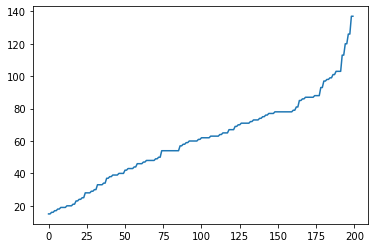

In [6]:
plt.plot(df['Annual Income (k$)'])
plt.show()

In [ ]:
##Univariate analysis

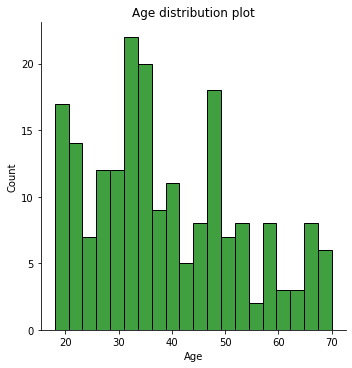

In [7]:
sns.displot(df['Age'],color= 'green',bins=20)
plt.title('Age distribution plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

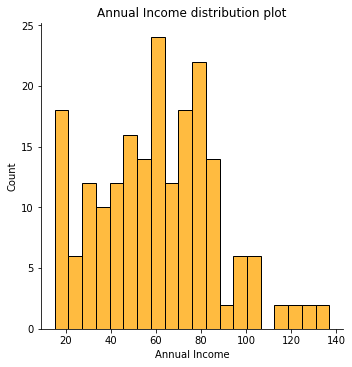

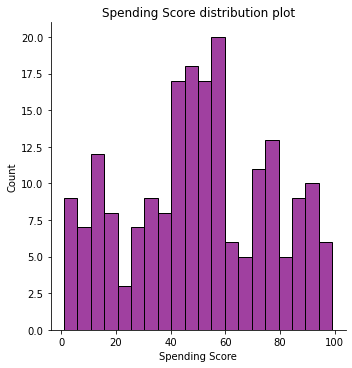

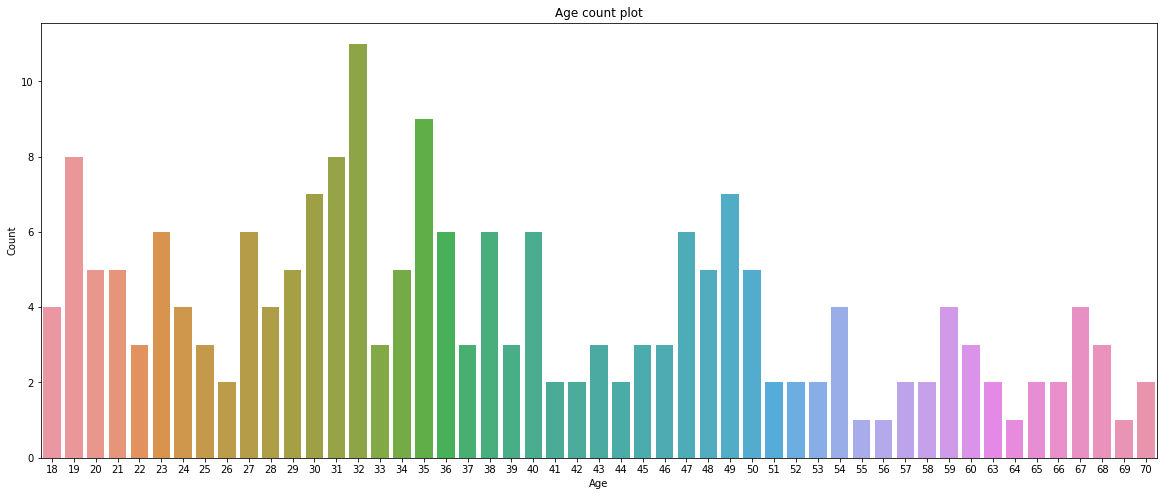

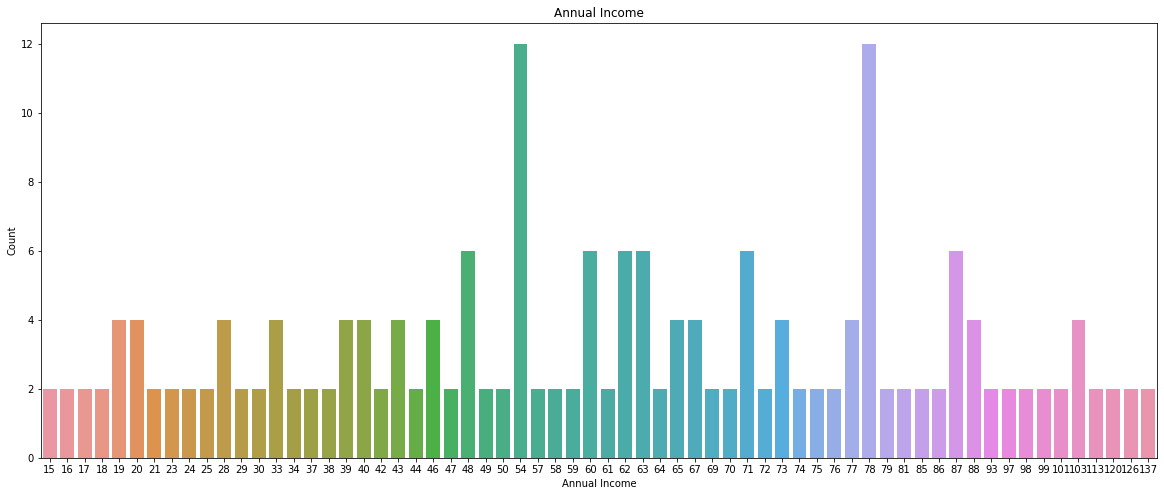

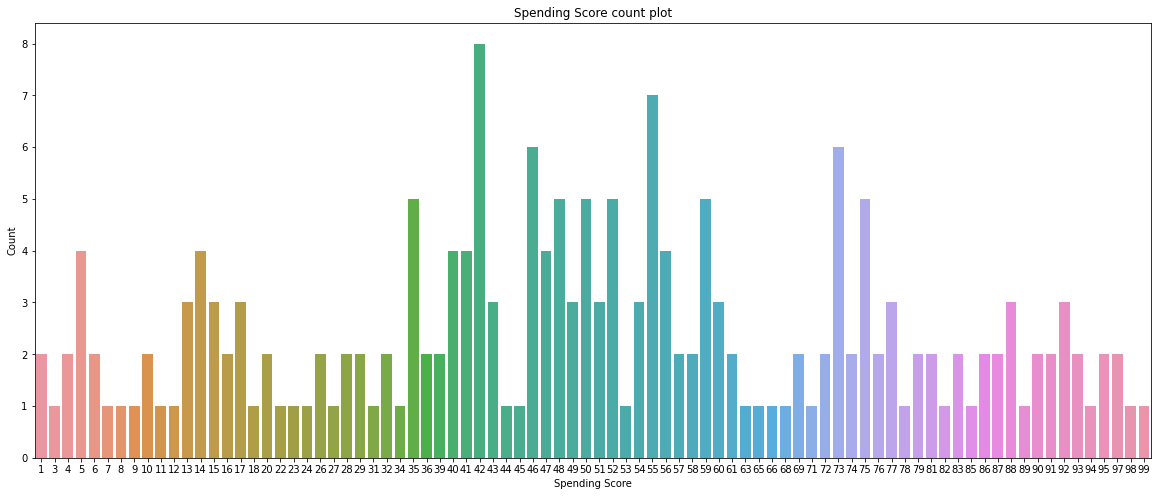

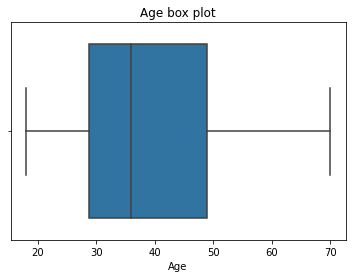

In [8]:
sns.displot(df['Annual Income (k$)'],color= 'orange',bins=20)
plt.title('Annual Income distribution plot')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()
sns.displot(df['Spending Score (1-100)'],color= 'purple',bins=20)
plt.title('Spending Score distribution plot')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'])
plt.title('Age count plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(20,8))
sns.countplot(x=df['Annual Income (k$)'])
plt.title('Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(20,8))
sns.countplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score count plot')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()
sns.boxplot(x=df['Age'])
plt.title('Age box plot')
plt.xlabel('Age')
plt.show()

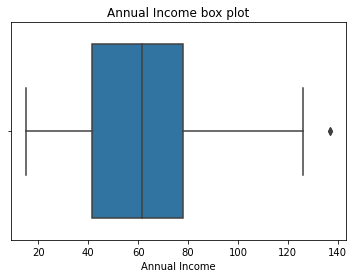

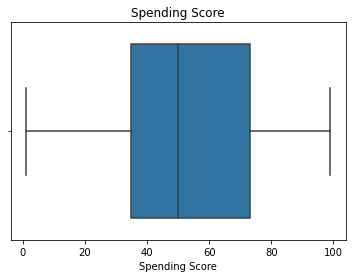

In [9]:
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Annual Income box plot')
plt.xlabel('Annual Income')
plt.show()
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.xlabel('Spending Score')
plt.show()


In [ ]:
##Bivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

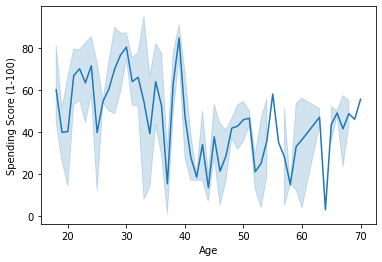

In [11]:
sns.lineplot(x=df['Age'],y=df['Spending Score (1-100)'])


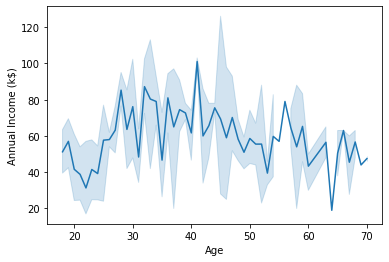

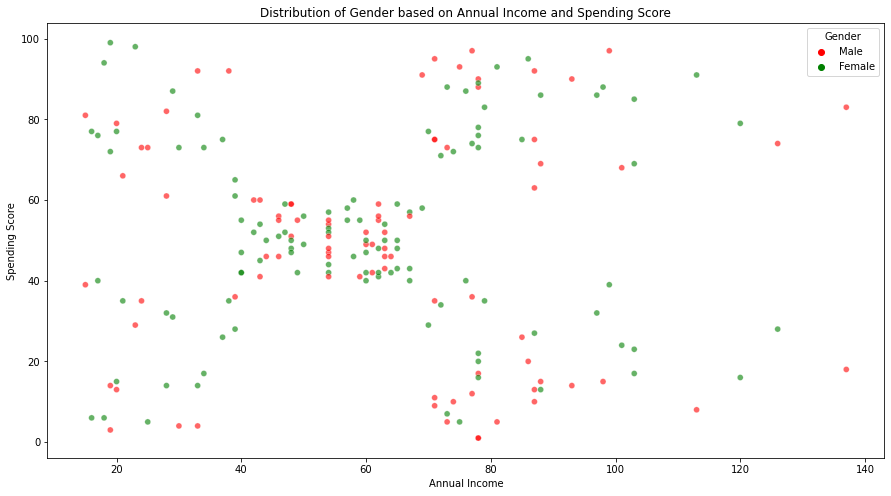

In [13]:
sns.lineplot(x=df['Age'],y=df['Annual Income (k$)'])
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Gender'],
                palette= ['red','green'] ,alpha=0.6)
plt.title('Distribution of Gender based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
##Multi-Variate Analysis

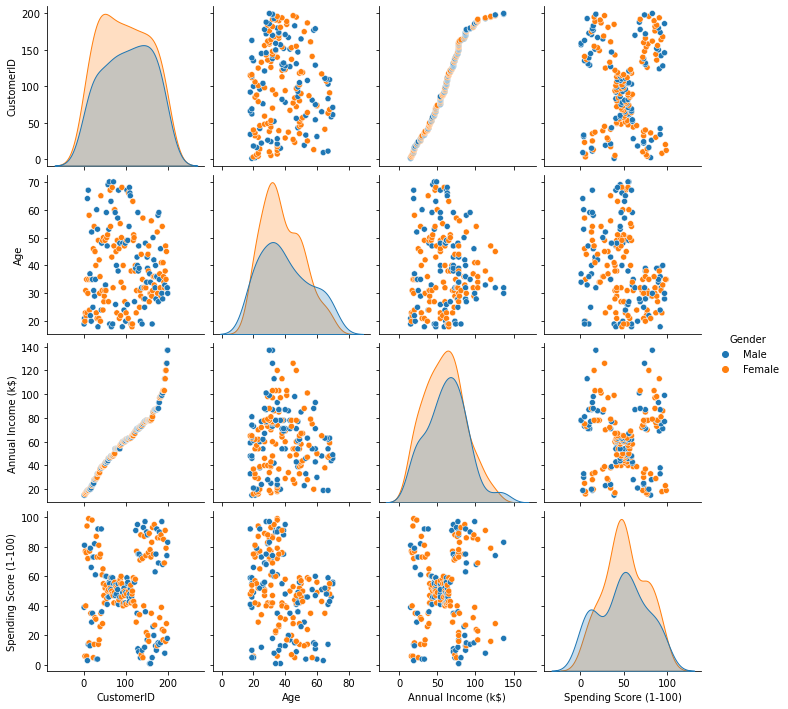

In [14]:
sns.pairplot(df,hue='Gender')

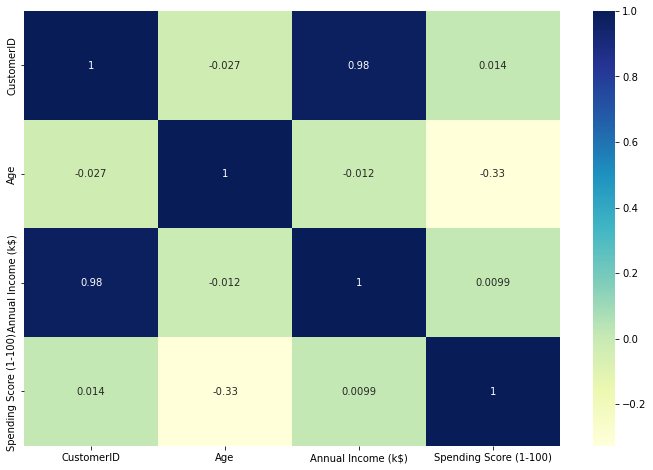

In [15]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True);

In [ ]:
##Descriptive statistics

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
##Handle the missing values

In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
##find the outliers and replace the outliers

In [18]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

Q1,Q3,IQR,lower_bound,upper_bound

(41.5, 78.0, 36.5, -13.25, 132.75)

In [19]:
df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [21]:
df[(df['Annual Income (k$)'] > lower_bound) & (df['Annual Income (k$)'] < upper_bound)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [22]:
df[(df['Annual Income (k$)'] > lower_bound) & (df['Annual Income (k$)'] < upper_bound)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


<AxesSubplot:xlabel='Annual Income (k$)'>

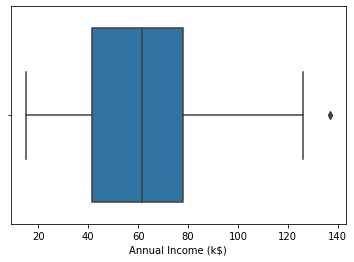

In [23]:
sns.boxplot(x=df['Annual Income (k$)'])

In [ ]:
##check for categorical columns and perform encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
##scaling the data

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918]])

In [ ]:
##perform any of the clustering algorithms

C:\Users\boopa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


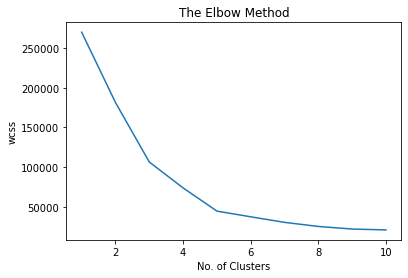

In [26]:
Income_Spend = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Income_Spend)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


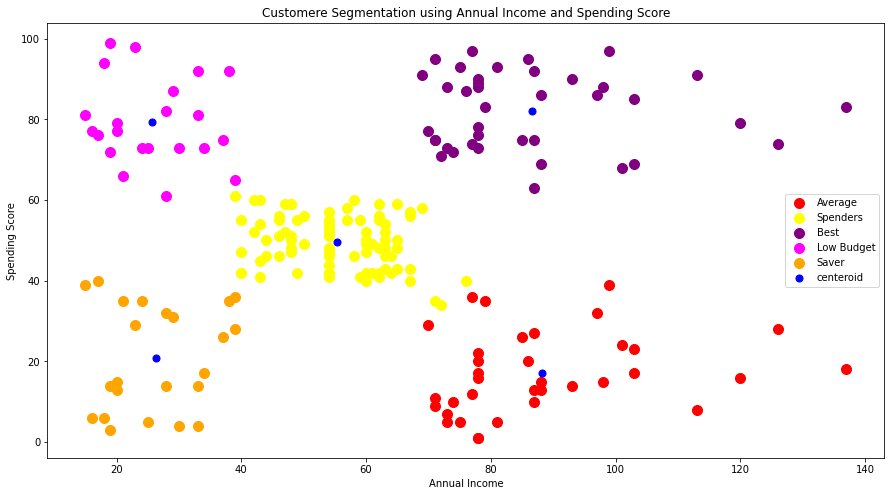

In [27]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Income_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Income_Spend[y_means == 0, 0], Income_Spend[y_means == 0, 1], s = 100, c = 'red', label = 'Average')
plt.scatter(Income_Spend[y_means == 1, 0], Income_Spend[y_means == 1, 1], s = 100, c = 'yellow', label = 'Spenders')
plt.scatter(Income_Spend[y_means == 2, 0], Income_Spend[y_means == 2, 1], s = 100, c = 'purple', label = 'Best')
plt.scatter(Income_Spend[y_means == 3, 0], Income_Spend[y_means == 3, 1], s = 100, c = 'magenta', label = 'Low Budget')
plt.scatter(Income_Spend[y_means == 4, 0], Income_Spend[y_means == 4, 1], s = 100, c = 'orange', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
##Add the cluster data with the primary dataset

In [28]:
pd.Series(y_means)

0      4
1      3
2      4
3      3
4      4
      ..
195    2
196    0
197    2
198    0
199    2
Length: 200, dtype: int32

In [29]:
df['Result'] = pd.Series(y_means)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Result
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [ ]:
##Split the data into dependent and independent variables

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Result                  200 non-null    int32
dtypes: int32(2), int64(4)
memory usage: 7.9 KB


In [31]:
x = df.iloc[:,1:5]
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [32]:
y = df['Result']
y.head()

0    4
1    3
2    4
3    3
4    4
Name: Result, dtype: int32

In [33]:
##Split the data into training and testing

In [34]:
x.shape, y.shape

((200, 4), (200,))

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74


In [36]:
x_train.shape

(160, 4)

In [37]:
x_test.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,1,24,60,52
15,1,22,20,79


In [38]:
x_test.shape
y_train.head(2)

79     1
197    2
Name: Result, dtype: int32

In [40]:
y_train.shape
y_test.head(2)

95    1
15    3
Name: Result, dtype: int32

In [41]:
y_test.shape

(40,)

In [42]:
##Build the model, Train the model and Test the model

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

param = {
    'max_depth':[3,6,9,12,15],
    'n_estimators' : [10,50,100,150,200] 
}

rf_search = RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),
                               n_jobs=-1,cv=5,verbose=3)

rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12, 15],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring=make_scorer(mean_squared_error), verbose=3)

In [44]:
means = rf_search.cv_results_['mean_test_score']
params = rf_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

0.052812 with: {'n_estimators': 10, 'max_depth': 9}
0.056010 with: {'n_estimators': 150, 'max_depth': 15}
0.051848 with: {'n_estimators': 50, 'max_depth': 9}
Best parameters with the minimum Mean Square Error are: {'n_estimators': 50, 'max_depth': 9}
0.065819 with: {'n_estimators': 200, 'max_depth': 9}
0.063250 with: {'n_estimators': 10, 'max_depth': 15}


In [45]:
rf = RandomForestRegressor(n_estimators=10, max_depth=9)
rf.fit(x_train,y_train)

rf_pred =  rf.predict(x_test)

In [46]:
##Measure the performance using metrics

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2 Score :',metrics.r2_score(y_test,rf_pred))

MAE: 0.08
MSE: 0.08050000000000002
RMSE: 0.28372521918222215
R2 Score : 0.9392166116092496
